In [14]:
import fnmatch
import json
import os

import numpy as np
from pycocotools import mask
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval


loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


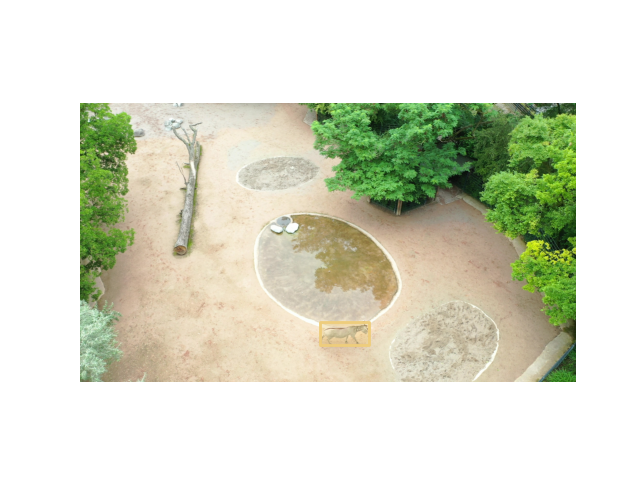

In [79]:
import skimage.io as io
import matplotlib.pyplot as plt

# change the json
json_file = "/media/ebonetto/WindowsData/Seafile/Processed-labels/14/mavic2/"
seq = np.random.choice(os.listdir(json_file))
json_file = os.path.join(json_file, seq, f'mavic2_{seq}_coco_annotations.json') 
coco = COCO(json_file)

catIds = [24]
%matplotlib inline
anns = []
imgIds = coco.getImgIds(catIds=catIds)
# change the index to load different images
index = np.random.randint(0, len(imgIds)) 
img = coco.loadImgs(imgIds[index])[0]
fname = img['file_name']
image_path = os.path.join(os.path.dirname(json_file), "./images", img['file_name'])
i = io.imread(image_path)
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

# for ann in anns:
# #     del ann['keypoints']
#     if 'keypoints' in ann:
#         tmp = np.array(ann['keypoints'])
#         tmp[:,2] = 2
#         tmp = tmp.flatten()
#         ann['keypoints'] = list(tmp)
    
%matplotlib widget    
plt.imshow(i); plt.axis('off')
plt.axis('off')
coco.showAnns(anns, draw_bbox=True)
plt.show()

loading annotations into memory...
Done (t=1.48s)
creating index...
index created!


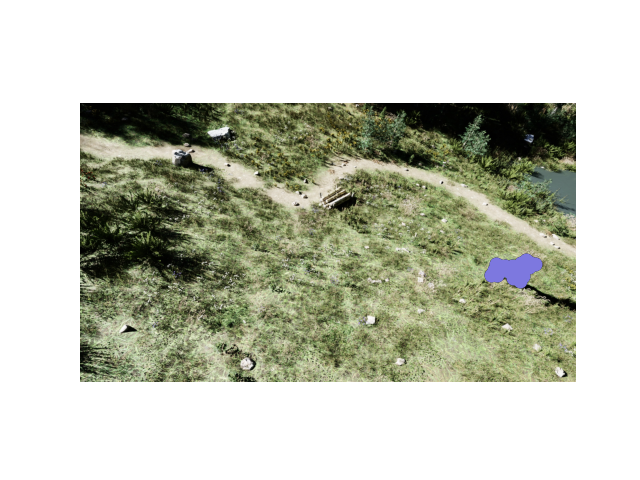

In [43]:
import skimage.io as io
import matplotlib.pyplot as plt

# change the json
json_file = "/media/ebonetto/WindowsData/pose_zebras_sw/ViTPose/data/merged_zebras/valid/valid_full.json"
coco = COCO(json_file)

catIds = [23]
%matplotlib inline
anns = []
imgIds = coco.getImgIds(catIds=catIds)
fname='video'
# change the index to load different images
while 'video' in fname:
    index = np.random.randint(0, len(imgIds)) 
    img = coco.loadImgs(imgIds[index])[0]
    fname = img['file_name']
image_path = os.path.join('/media/ebonetto/WindowsData/pose_zebras_sw/ViTPose/data/merged_zebras/valid/images', img['file_name'])
i = io.imread(image_path)
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco.loadAnns(annIds)

for ann in anns:
    k = [0]*81
#     ann['keypoints'][0:3] = k[39:42] # left back paw
#     ann['keypoints'][3:6] = k[36:39] # left back knee
#     ann['keypoints'][6:9] = k[33:36] # left back thigh
    
#     ann['keypoints'][9:12]  = k[48:51] # r back paw
#     ann['keypoints'][12:15] = k[45:48] # r back knee
#     ann['keypoints'][15:18] = k[42:45] # r back thigh
    
#     ann['keypoints'][18:21] = k[30:33] # r f p
#     ann['keypoints'][21:24] = k[27:30] # r f k
#     ann['keypoints'][24:27] = k[24:27] # r f t
    
#     ann['keypoints'][27:30] = k[21:24] # l f p
#     ann['keypoints'][30:33] = k[18:21] # l f k
#     ann['keypoints'][33:36] = k[15:18] # l f t
    
#     ann['keypoints'][54:57] = k[3:6] # right eye
#     ann['keypoints'][57:60] = k[0:3] # left eye
#     ann['keypoints'][60:63] = k[6:9] # nose


#     ann['keypoints'][36:39] = k[6:9] # nose
#     ann['keypoints'][39:42] = k[6:9] # nose
#     ann['keypoints'][42:45] = k[6:9] # nose
#     ann['keypoints'][45:48] = k[6:9] # nose
#     ann['keypoints'][48:51] = k[6:9] # nose
#     ann['keypoints'][51:54] = k[6:9] # nose
#     ann['keypoints'][63:66] = k[6:9] # nose
#     ann['keypoints'][66:69] = k[6:9] # nose
#     ann['keypoints'][69:72] = k[6:9] # nose
#     ann['keypoints'][72:75] = k[6:9] # nose
#     ann['keypoints'][75:78] = k[6:9] # nose
#     ann['keypoints'][78:81] = k[6:9] # nose

    
%matplotlib widget    
plt.imshow(i); plt.axis('off')
plt.axis('off')
coco.showAnns(anns, draw_bbox=False)


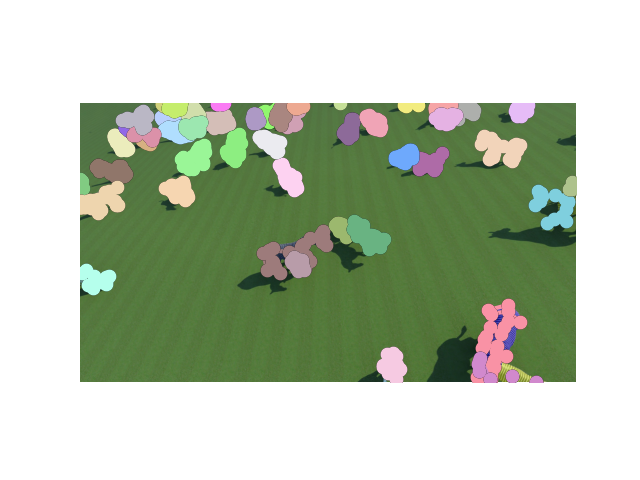

In [42]:
%matplotlib widget    
plt.imshow(i); plt.axis('off')
plt.axis('off')
coco.showAnns(anns, draw_bbox=False)


In [44]:
plt.savefig('/home/ebonetto/zebraskel.svg',  format='svg', dpi=1200)

In [37]:
f = "/media/ebonetto/WindowsData/ZEBRA_PROCESSED_leg_hidden/Bliss/Viewport0/object/masks/Bliss_annos_gt.json"
tmp = json.load(open(f,'r'))

In [32]:
tmp['categories'][1]['keypoints'] = [
                        'left_back_paw','left_back_knee','left_back_thigh',
                        'right_back_paw','right_back_knee','right_back_thigh',
                        'right_front_paw','right_front_knee','right_front_thigh',
                        'left_front_paw','left_front_knee', 'left_front_thigh',
                        'tail_end','tail_base',
                        'right_ear_tip','right_ear_base','left_ear_tip','left_ear_base',
                        'right_eye','left_eye','nose',
                        'neck_start','neck_end','skull','body_middle',
                        'back_end','back_front'
                    ]
tmp['categories'][1]['skeleton'] = [
    [1, 2], [2, 3], [3, 26],
    [4, 5], [5, 6], [6, 26],
    [7, 8], [8, 9],
    [10,11], [11,12],
    [13, 14],
    [15, 16], [17,18],
    [16, 19], [19, 20], [18, 20],
    [19, 21], [20, 21], [19, 24], [20, 24],
    [21, 24], [24, 23], [23, 22], [22, 27], [27, 9], [27, 12], [27, 25], [25, 26], [26, 14]
]

torem = []
for idx, j in enumerate(tmp['annotations']):
#     if min(j['bbox'][2:]) < 20:
#         torem.append(idx)
    if 'keypoints' not in j.keys():
        torem.append(idx)
for i in torem[::-1]:
    tmp['annotations'].pop(i)

In [33]:
json.dump(tmp, open(f,'w'))

In [13]:
len(torem)

11037

In [14]:
len(tmp['annotations'])

70024